In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Atlanta Police Department ![APD Logo](https://atlantapd.galls.com/photos/partners/atlantapd/logo.jpg)


The Atlanta Police Department provides Part 1 crime data at http://www.atlantapd.org/crimedatadownloads.aspx

A recent copy of the data file is stored in the cluster. <span style="color: red; font-weight: bold;">Please, do not copy this data file into your home directory!</span>

In [2]:
### Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    To make a legend for lines which already exist on the axes
    (via plot for instance), simply call this function with an iterable
    of strings, one for each legend item. For example::
    
        ax.plot([1, 2, 3])
        ax.legend(['A simple line'])
    
    However, in order to keep the "label" and the legend element
    instance together, it is preferable to specify the label either at
    artist creation, or by calling the
    :meth:`~matplotlib.artist.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        # Overwrite the label by calling the method.
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label starting with an underscore.
    This is default for all artists, so calling :meth:`leg

Load data (don't change this if you're running the notebook on the cluster)

We have two files
- `/home/data/APD/COBRA083016_2015.xlsx` for 2015
- `/home/data/APD/COBRA083016.xlsx` from 2009 to current date

In [3]:
%%time
df = pd.read_excel('/home/data/APD/COBRA083016_2015.xlsx', sheetname='Query')

CPU times: user 1min 26s, sys: 882 ms, total: 1min 27s
Wall time: 1min 27s


In [28]:
df.shape

(30011, 23)

In [17]:
for c in df.columns:
    print(c)

MI_PRINX
offense_id
rpt_date
occur_date
occur_time
poss_date
poss_time
beat
apt_office_prefix
apt_office_num
location
MinOfucr
MinOfibr_code
dispo_code
MaxOfnum_victims
Shift
Avg Day
loc_type
UC2 Literal
neighborhood
npu
x
y


In [70]:
df[0:5]

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y,occur_ts,occur_month,occur_woy
206914,1371687,150562000,05/14/2013,05/14/2013,09:00:00,05/14/2013,11:30:00,205,NaN,NaN,...,Tue,18.0,LARCENY-FROM VEHICLE,Woodfield,C,-84.40912,33.82308,2013-05-14 09:00:00,5.0,20.0
207443,4346442,150010052,01/01/2015,12/31/2014,22:00:00,01/01/2015,00:07:00,512,NaN,NaN,...,Wed,NaN,LARCENY-FROM VEHICLE,Downtown,M,-84.39361,33.75246,2014-12-31 22:00:00,12.0,1.0
207444,4346443,150010079,01/01/2015,01/01/2015,00:03:00,01/01/2015,00:03:00,606,NaN,3377,...,Thu,26.0,ROBBERY-PEDESTRIAN,Grant Park,W,-84.35917,33.73991,2015-01-01 00:03:00,1.0,1.0
207445,4346444,150010151,01/01/2015,12/31/2014,23:45:00,01/01/2015,00:21:00,208,NaN,NaN,...,Thu,18.0,LARCENY-NON VEHICLE,Buckhead Forest,B,-84.37462,33.84564,2014-12-31 23:45:00,12.0,1.0
207446,4346445,150010214,01/01/2015,01/01/2015,00:30:00,01/01/2015,01:05:00,407,1000,1009,...,Thu,26.0,AGG ASSAULT,Fairburn Mays,H,-84.50968,33.74349,2015-01-01 00:30:00,1.0,1.0


In [29]:
df.describe()

/usr/lib64/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,MI_PRINX,offense_id,beat,MinOfucr,MaxOfnum_victims,loc_type,x,y
count,3.001100e+04,3.001100e+04,30011.000000,30011.000000,30011.000000,26903.000000,30011.000000,30011.000000
mean,4.361347e+06,1.518675e+08,359.417813,594.219886,1.194695,21.109356,-84.408346,33.756058
std,1.931052e+04,1.029128e+06,169.563281,114.321851,0.799062,16.579831,0.046894,0.045981
min,1.371687e+06,1.500101e+08,101.000000,210.000000,0.000000,1.000000,-84.546070,33.637450
25%,4.353944e+06,1.510128e+08,208.000000,512.000000,1.000000,NaN,-84.432445,33.729060
50%,4.361446e+06,1.518913e+08,401.000000,640.000000,1.000000,NaN,-84.398210,33.756000
75%,4.368948e+06,1.527329e+08,505.000000,670.000000,1.000000,NaN,-84.374420,33.781470
max,4.376451e+06,1.536580e+08,709.000000,730.000000,44.000000,99.000000,-84.290480,33.883250


In [20]:
df.offense_id.min(), df.offense_id.max()

(150010052, 153658045)

In [30]:
df.groupby(['UC2 Literal']).offense_id.count()

UC2 Literal
AGG ASSAULT             2111
AUTO THEFT              4234
BURGLARY-NONRES          817
BURGLARY-RESIDENCE      3921
LARCENY-FROM VEHICLE    9539
LARCENY-NON VEHICLE     7092
RAPE                     154
ROBBERY-COMMERCIAL       235
ROBBERY-PEDESTRIAN      1721
ROBBERY-RESIDENCE        187
Name: offense_id, dtype: int64

## Exploring Dates

In [31]:
df[['offense_id', 'occur_date', 'occur_time', 'rpt_date']][1:10]

,offense_id,occur_date,occur_time,rpt_date
207443,150010052,12/31/2014,22:00:00,01/01/2015
207444,150010079,01/01/2015,00:03:00,01/01/2015
207445,150010151,12/31/2014,23:45:00,01/01/2015
207446,150010214,01/01/2015,00:30:00,01/01/2015
207447,150010359,12/31/2014,21:00:00,01/01/2015
207448,150010370,12/31/2014,23:15:00,01/01/2015
207449,150010413,12/31/2014,23:00:00,01/01/2015
207450,150010417,01/01/2015,02:00:00,01/01/2015
207451,150010419,01/01/2015,01:50:00,01/01/2015


Convert into date-time type

In [43]:
df['occur_ts'] = pd.to_datetime(df.occur_date+' '+df.occur_time)

In [47]:
#df[['offense_id', 'occur_date', 'occur_time', 'occur_ts', 'rpt_date']][1:10]

In [48]:
df['occur_ts'] = pd.to_datetime(df.occur_date+' '+df.occur_time)
df['occur_month'] = df['occur_ts'].map(lambda x: x.month)
df['occur_woy'] = df.occur_ts.dt.weekofyear

In [42]:
df.describe()

/usr/lib64/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,MI_PRINX,offense_id,beat,MinOfucr,MaxOfnum_victims,loc_type,x,y,occur_month,occur_woy
count,3.001100e+04,3.001100e+04,30011.000000,30011.000000,30011.000000,26903.000000,30011.000000,30011.000000,10.000000,10.000000
mean,4.361347e+06,1.518675e+08,359.417813,594.219886,1.194695,21.109356,-84.408346,33.756058,6.900000,2.900000
std,1.931052e+04,1.029128e+06,169.563281,114.321851,0.799062,16.579831,0.046894,0.045981,5.506562,6.008328
min,1.371687e+06,1.500101e+08,101.000000,210.000000,0.000000,1.000000,-84.546070,33.637450,1.000000,1.000000
25%,4.353944e+06,1.510128e+08,208.000000,512.000000,1.000000,NaN,-84.432445,33.729060,NaN,NaN
50%,4.361446e+06,1.518913e+08,401.000000,640.000000,1.000000,NaN,-84.398210,33.756000,NaN,NaN
75%,4.368948e+06,1.527329e+08,505.000000,670.000000,1.000000,NaN,-84.374420,33.781470,NaN,NaN
max,4.376451e+06,1.536580e+08,709.000000,730.000000,44.000000,99.000000,-84.290480,33.883250,12.000000,20.000000


In [49]:
resdf = df.groupby(['UC2 Literal', 'occur_month']).offense_id.count()
resdf

UC2 Literal         occur_month
AGG ASSAULT         1.0            156
                    2.0            139
                    3.0            189
                    4.0            191
                    5.0            182
                    6.0            205
                    7.0            201
                    8.0            209
                    9.0            176
                    10.0           172
                    11.0           142
                    12.0           149
AUTO THEFT          1.0            351
                    2.0            279
                    3.0            359
                    4.0            332
                    5.0            408
                    6.0            452
                    7.0            396
                    8.0            405
                    9.0            334
                    10.0           369
                    11.0           262
                    12.0           284
BURGLARY-NONRES     1.0         

In [50]:
resdf['BURGLARY-RESIDENCE'].as_matrix()

array([357, 232, 303, 311, 375, 323, 316, 292, 298, 340, 340, 432])

In [ ]:
resdf['BURGLARY-RESIDENCE'].iloc(0)

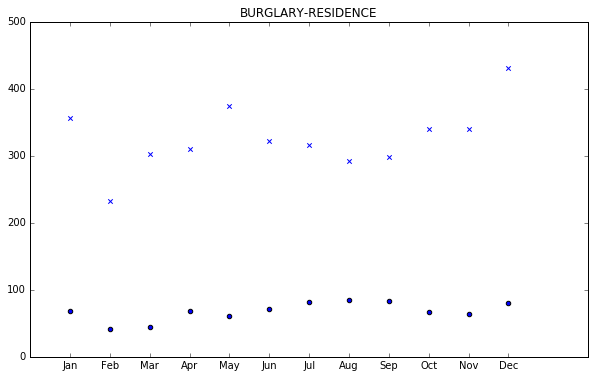

In [69]:
%matplotlib inline
fig = plt.figure(figsize=(10,6)) # 10inx10in
#plt.plot(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'])
plt.scatter(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'], marker='x')
plt.scatter(resdf['BURGLARY-NONRES'].index, resdf['BURGLARY-NONRES'], marker='o')

plt.ylim(0, 500)
plt.title('BURGLARY-RESIDENCE')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.savefig('BurglaryResidence_over_month.svg')
x = 1

In [4]:
df = pd.read_excel('/home/data/APD/COBRA083016_2015.xlsx', sheetname='Query')
df['occur_ts'] = pd.to_datetime(df.occur_date+' '+df.occur_time)
df['occur_month'] = df['occur_ts'].map(lambda x: x.month)
df['occur_woy'] = df.occur_ts.dt.weekofyear

''

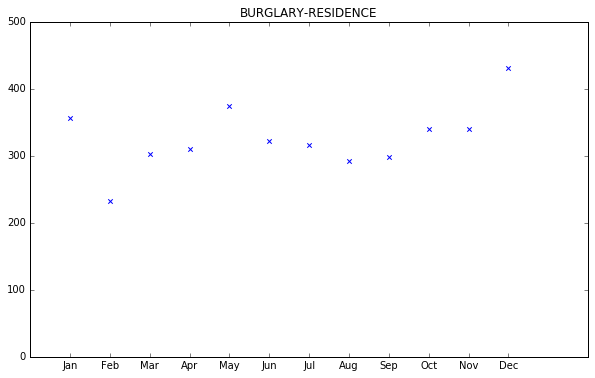

In [11]:
%matplotlib inline
resdf = df.groupby(['UC2 Literal', 'occur_month']).offense_id.count()
fig = plt.figure(figsize=(10,6))
plt.scatter(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'], marker='x')
plt.ylim(0, 500)
plt.title('BURGLARY-RESIDENCE')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('quiz3-burglary-residence.png')

''

In [10]:
plt.savefig('quiz3-burglary-residence.png')


# Part 1 - Observations from the data


# Part 2 - Seasonal Model

In [13]:
## load complete dataset
dff = pd.read_excel('/home/data/APD/COBRA083016.xlsx', sheetname='Query')

In [17]:
dff.shape

(256216, 23)

In [18]:
for evt in ['occur', 'poss']:
    dff['%s_ts'%evt] = pd.to_datetime(dff['%s_date'%evt]+' '+dff['%s_time'%evt])
dff['rpt_ts'] = pd.to_datetime(dff.rpt_date)

In [16]:
', '.join(dff.columns)

'MI_PRINX, offense_id, rpt_date, occur_date, occur_time, poss_date, poss_time, beat, apt_office_prefix, apt_office_num, location, MinOfucr, MinOfibr_code, dispo_code, MaxOfnum_victims, Shift, Avg Day, loc_type, UC2 Literal, neighborhood, npu, x, y, occur_ts, poss_ts, rpt_ts, occ_year, occ_month, occ_dayweek'

In [19]:
dff['occur_year'] = dff.occur_ts.dt.year
dff['occur_month'] = dff.occur_ts.dt.month
dff['occur_dayweek'] = dff.occur_ts.dt.dayofweek

### Crime per year
Let's look at the 

In [20]:
crime_year = dff[dff.occur_year.between(2009, 2015)].groupby(by=['UC2 Literal', 'occur_year']).offense_id.count()

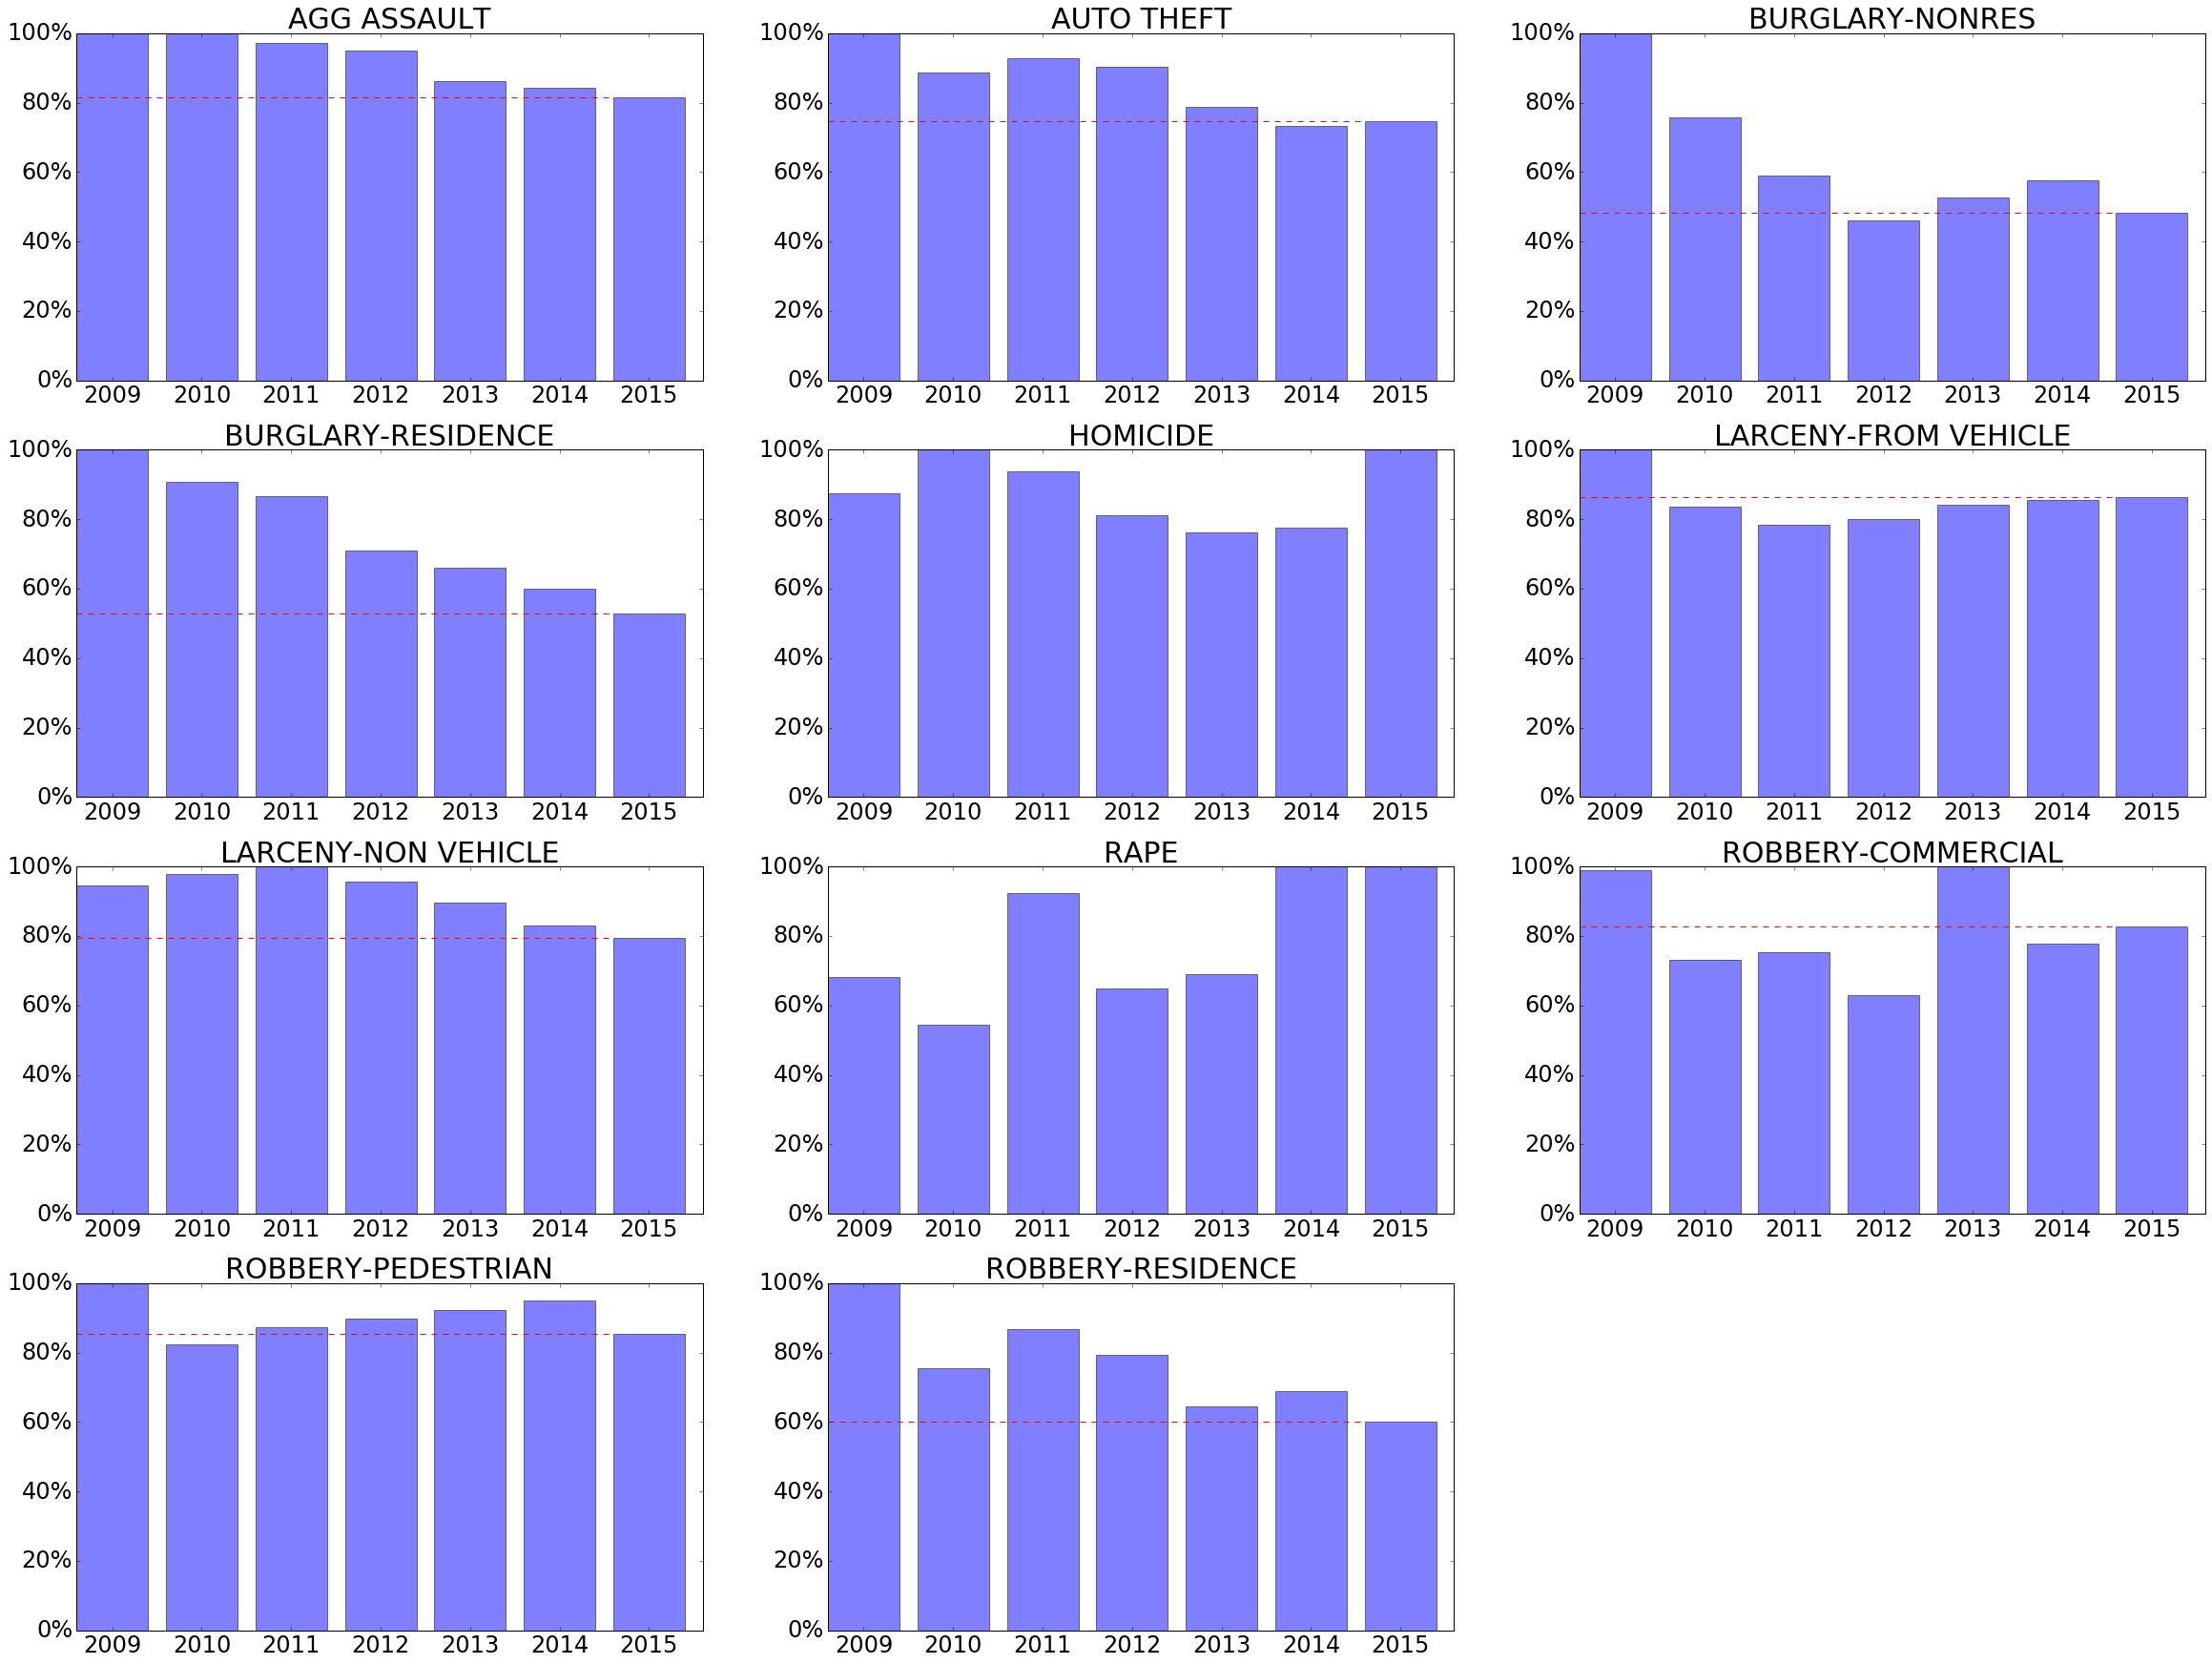

In [21]:
%matplotlib inline
fig = plt.figure(figsize=(40,30))
crime_types = crime_year.index.levels[0]
years = crime_year.index.levels[1]
for c in range(len(crime_types)):
    y_max = max(crime_year.loc[crime_types[c]])
    
    plt.subplot(4,3,c+1)
    plt.hlines(crime_year.loc[crime_types[c]].iloc[-1]*100/y_max, years[0], years[-1], linestyles="dashed", color="r")
    plt.bar(crime_year.loc[crime_types[c]].index, crime_year.loc[crime_types[c]]*100/y_max, label=crime_types[c], alpha=0.5)
    ##plt.legend()
    plt.ylim(0, 100)
    plt.xticks(years+0.4, [str(int(y)) for y in years], rotation=0, fontsize=24)
    plt.yticks([0,20,40,60,80,100], ['0%','20%','40%','60%','80%','100%'], fontsize=24)
    plt.title(crime_types[c], fontsize=30)
    None

Let's look at residential burglary.

In [22]:
c = 3
crime_types[c]

'BURGLARY-RESIDENCE'

In [25]:
crime_year_month = dff[dff.occur_year.between(2009, 2015)].groupby(by=['UC2 Literal', 'occur_year', 'occur_month']).offense_id.count()

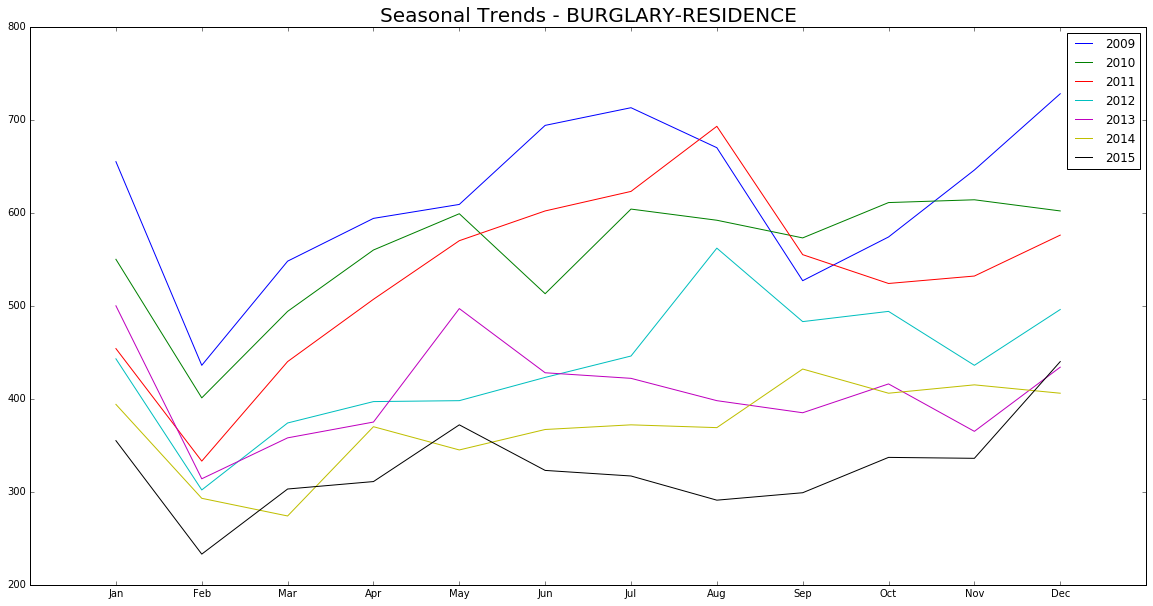

In [26]:
c = 3 ## 'BURGLARY-RESIDENCE'
resburglaries = crime_year_month.loc[crime_types[c]]
fig = plt.figure(figsize=(20,10))
for y in years:
    plt.plot(resburglaries.loc[y].index, resburglaries.loc[y], label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s"%crime_types[c], fontsize=20)
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
None

Normalized over the annual average

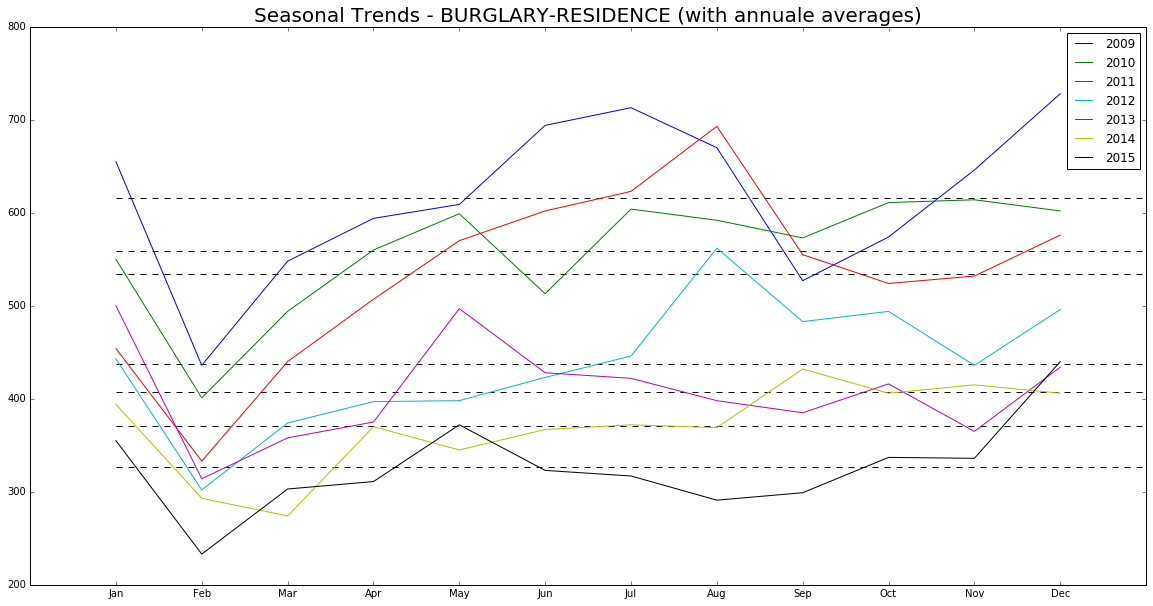

In [27]:
c = 3 ## 'BURGLARY-RESIDENCE'
fig = plt.figure(figsize=(20,10))
for y in years:
    avg = resburglaries.loc[y].mean()
    plt.hlines(avg, 1, 13, linestyle='dashed')
    plt.plot(resburglaries.loc[y].index, resburglaries.loc[y], label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s (with annuale averages)"%crime_types[c], fontsize=20)
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
None

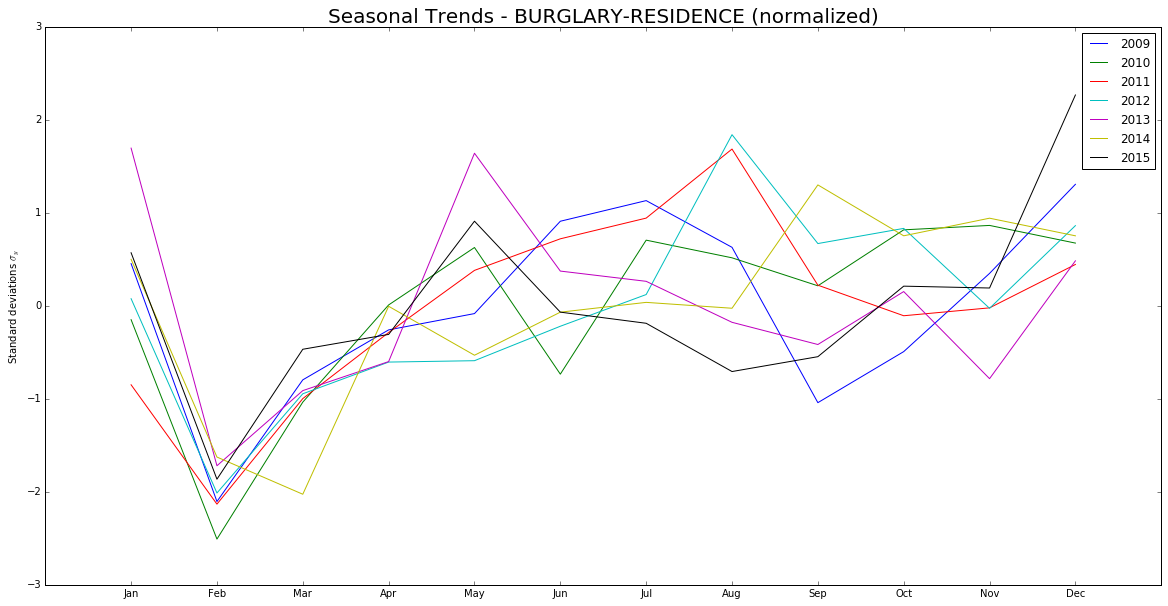

In [28]:
c = 3 ## 'BURGLARY-RESIDENCE'
fig = plt.figure(figsize=(20,10))
for y in years:
    avg = resburglaries.loc[y].mean()
    std = resburglaries.loc[y].std()
    ##plt.hlines(avg, 1, 13, linestyle='dashed')
    plt.plot(resburglaries.loc[y].index, (resburglaries.loc[y]-avg)/std, label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s (normalized)"%crime_types[c], fontsize=20)
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
plt.ylabel("Standard deviations $\sigma_y$")
None

In [40]:
seasonal_adjust = resburglaries.reset_index().groupby(by=['occur_month']).offense_id.agg('mean')

### Fitting the regression line
Suppose there are $n$ data points {{math|{(''x<sub>i</sub>'', ''y<sub>i</sub>''), ''i'' {{=}} 1, ..., ''n''}.}} The function that describes x and y is:

$$y_i = \alpha + \beta x_i + \varepsilon_i.$$

The goal is to find the equation of the straight line

$$y = \alpha + \beta x,$$

which would provide a "best" fit for the data points. Here the "best" will be understood as in the [[Ordinary least squares|least-squares]] approach: a line that minimizes the sum of squared residuals of the linear regression model. In other words, {{mvar|α}} (the {{mvar|y}}-intercept) and {{mvar|β}} (the slope) solve the following minimization problem:

$$\text{Find }\min_{\alpha,\,\beta} Q(\alpha, \beta), \qquad \text{for } Q(\alpha, \beta) = \sum_{i=1}^n\varepsilon_i^{\,2} = \sum_{i=1}^n (y_i - \alpha - \beta x_i)^2\ $$

By using either [[calculus]], the geometry of [[inner product space]]s, or simply expanding to get a quadratic expression in {{mvar|α}} and {{mvar|β}}, it can be shown that the values of {{mvar|α}} and {{mvar|β}} that minimize the objective function {{mvar|Q}}<ref>Kenney, J. F. and Keeping, E. S. (1962) "Linear Regression and Correlation." Ch. 15 in ''Mathematics of Statistics'', Pt. 1, 3rd ed. Princeton, NJ: Van Nostrand, pp. 252–285</ref> are

: <math>\begin{align}
  \hat\beta &= \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i=1}^n (x_i - \bar{x})^2 } \\[6pt]
            &= \frac{ \sum_{i=1}^{n} (x_i y_i - x_i \bar{y} - \bar{x} y_i + \bar{x} \bar{y})} { \sum_{i=1}^n (x_i^2 - 2 x_i \bar{x} + \bar{x}^2) } \\[6pt]
            &= \frac{ \sum_{i=1}^{n} (x_i y_i) - \bar{y} \sum_{i=1}^{n}  x_i  - \bar{x} \sum_{i=1}^{n} y_i + n  \bar{x} \bar{y}} { \sum_{i=1}^n (x_i^2) - 2 \bar{x}  \sum_{i=1}^n  x_i  + n \bar{x}^2 } \\[6pt]
            &= \frac{ \frac{1}{n} \sum_{i=1}^{n} x_i y_i - \bar{x} \bar{y} }{ \frac{1}{n}\sum_{i=1}^n {x_i^2} -   \overline{x}^2 } \\[6pt]
            &= \frac{ \overline{xy} - \bar{x}\bar{y} }{ \overline{x^2} - \bar{x}^2 } = \frac{ \operatorname{Cov}[x, y] }{ \operatorname{Var}[x] } \\
            &= r_{xy} \frac{s_y}{s_x}, \\[6pt]
 \hat\alpha & = \bar{y} - \hat\beta\,\bar{x},
\end{align}</math>

where {{math|''r<sub>xy</sub>''}} is the [[Correlation#Pearson's product-moment coefficient|sample correlation coefficient]] between {{mvar|x}} and {{mvar|y}}; and {{math|''s<sub>x</sub>''}} and {{math|''s<sub>y</sub>''}} are the [[sample standard deviation]] of {{mvar|x}} and {{mvar|y}}. A horizontal bar over a quantity indicates the average value of that quantity. For example:

:<math>\overline{xy} = \frac{1}{n} \sum_{i=1}^n x_i y_i.</math>

Substituting the above expressions for <math>\hat{\alpha}</math> and <math>\hat{\beta}</math> into

: <math>f = \hat{\alpha} + \hat{\beta} x,</math>

yields

: <math>\frac{ f - \bar{y}}{s_y} = r_{xy} \frac{ x - \bar{x}}{s_x}  </math>

This shows that {{math|''r<sub>xy</sub>''}} is the slope of the regression line of the [[Standard score|standardized]] data points (and that this line passes through the origin).

It is sometimes useful to calculate {{math|''r<sub>xy</sub>''}} from the data independently using this equation:

:<math>r_{xy} = \frac{ \overline{xy} - \bar{x}\bar{y} }{ \sqrt{ \left(\overline{x^2} - \bar{x}^2\right)\left(\overline{y^2} - \bar{y}^2\right)} } </math>

The [[coefficient of determination]] (R squared) is equal to <math>r_{xy}^2</math> when the model is linear with a single independent variable. See [[Correlation#Pearson's product-moment coefficient|sample correlation coefficient]] for additional details.

===Linear regression without the intercept term===
Sometimes it is appropriate to force the regression line to pass through the origin, because {{mvar|x}} and {{mvar|y}} are assumed to be proportional. For the model without the intercept term, {{math|''y'' {{=}} ''βx''}}, the OLS estimator for {{mvar|β}} simplifies to

: <math>\hat{\beta} = \frac{ \sum_{i=1}^n x_i y_i }{ \sum_{i=1}^n x_i^2 } = \frac{\overline{x y}}{\overline{x^2}} </math>

Substituting {{math|(''x'' − ''h'', ''y'' − ''k'')}} in place of {{math|(''x'', ''y'')}} gives the regression through {{math|(''h'', ''k'')}}:

: <math>\begin{align}
  \hat\beta &= \frac{\overline{(x - h) (y - k)}}{\overline{(x - h)^2}} \\[6pt]
            &= \frac{\overline{x y} + k \bar{x} - h \bar{y} - h k }{\overline{x^2} - 2 h \bar{x} + h^2} \\[6pt]
            &= \frac{\overline{x y} - \bar{x} \bar{y} + (\bar{x} - h)(\bar{y} - k)}{\overline{x^2} - \bar{x}^2 + (\bar{x} - h)^2} \\[6pt]
            &= \frac{\operatorname{Cov}[x,y] + (\bar{x} - h)(\bar{y}-k)}{\operatorname{Var}[x] + (\bar{x} - h)^2}
\end{align}</math>

The last form above demonstrates how moving the line away from the center of mass of the data points affects the slope.


In [23]:
### in case we want to save a DataFrame
#writer = pd.ExcelWriter('myresults.xlsx')
#df.to_excel(writer,'Results')
#writer.save()

In [ ]:
resdf